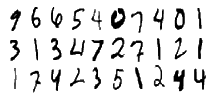

# 1. Introduction 

The purpose of this project is to present a prediction model using Neural Networks for digits recognision. The data is obtained from the popular MNIST dataset.

In [38]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation   import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.optimizers import SGD

import tensorflow

%matplotlib inline

np.random.seed(42)

sns.set(style='white', palette='deep', context='notebook')

# 2. Data Import and Explodation 

## 2.1 Import and Explore

In [39]:
# Load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [40]:
# Display data structure
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Size and info
print("*****INFO*****")
print(train.info())
print("\n*****SHAPE*****")
print(train.shape)

*****INFO*****
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None

*****SHAPE*****
(42000, 785)


In [42]:
# Separate the dataframe into the classes and the features
y_train = train['label']
X_train = train.drop(labels=['label'],axis=1)

In [43]:
# Print value count
print(y_train.value_counts())

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


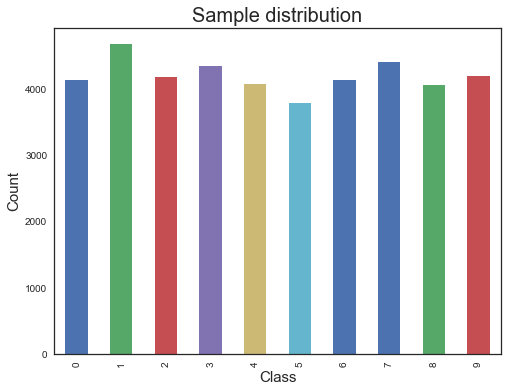

In [44]:
# Plot sample distribution
fig = plt.figure(num=None, figsize=(8, 6))
y_train.value_counts().sort_index().plot(kind='bar')
plt.title('Sample distribution',fontsize=20)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Count',fontsize=15);

## 2.2 Assess Data Quality

In [45]:
# Check the dataset for missing values
X_train.isnull().any().sum()

0

In [46]:
X_train.shape

(42000, 784)

The training set does not contain any missing value. 

In [47]:
# Check the test set for missing values
test.isnull().any().sum()

0

The test set does not contain any missing value. 

## 2.4 Output features

When using neural network, we want to approach the in a similar fashion as a logistic regression that is, we want each possible outcome to be encoded into a single boolean output feature.

In [48]:
y_train_plot = y_train
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes = 10)

In [49]:
# Print y-train shape
y_train.shape

(42000, 10)

In [50]:
# Encoding verification
print(y_train.sum(axis=1).max())
print(y_train.sum(axis=1).min())

1.0
1.0


Each row only contains a single "1" value.

## 2.5 Data Preparation

In this section, we will create some visualizations of the given data.

In [51]:
# Convert dataframe into numpy array
X_train = X_train.values

In [52]:
# Check
X_train.shape

(42000, 784)

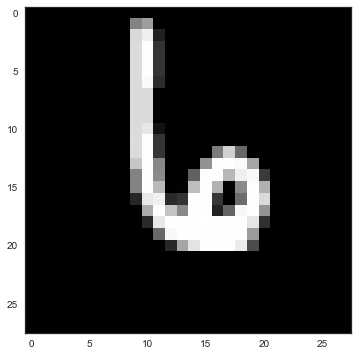

In [53]:
# Plot a single image
# Per the information of this project, the original image are 28x28 pixels in dimension.
fig = plt.figure(num=None, figsize=(8, 6))
plt.imshow(X_train[123].reshape(28,28),interpolation='nearest',cmap='gray');

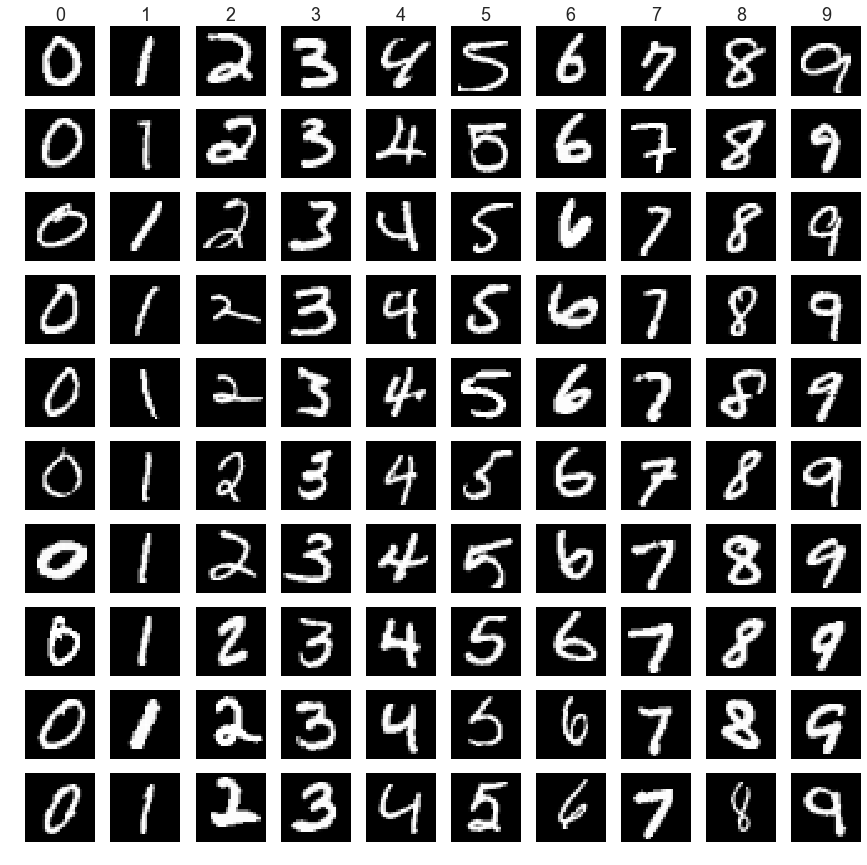

In [54]:
# Multiplot by class
labels = [i for i in range(10)]

n_line_plot = 10

fig = plt.figure(num=None, figsize=(15, 15))

for col_num, label in enumerate(labels):
    # obtain the index for specific label
    index_labels = np.nonzero(y_train_plot==label)[0]
    
    # Extract n_line_plot items from the index_labels
    index_labels = np.random.choice(index_labels,size=n_line_plot,replace=False)
    
    # Plot the image
    for pos, idx in enumerate(index_labels):
        
        # plot same class column-wise
        plot_idx = pos*len(labels)+col_num + 1
        plt.subplot(n_line_plot,len(labels),plot_idx)
        plt.imshow(X_train[idx].reshape(28,28),cmap='gray')
    
        # Clean plot (remove axes)
        plt.axis('off')
        if pos == 0:
            plt.title(label,fontsize=18)
    
plt.show() 

## 2.6 Normalization

The data is presented using a grayscale from 0 (black) to 255 (white). The data is normalized to range from 0. to 1.

In [55]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

## 2.7 Training and Validation sets

In [56]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size = 0.2, random_state = 123)

# 3 Neural Network

## Initial model

In [71]:
# Create the model: model
model = tensorflow.keras.Sequential()

sequence = [28*28,100,75,50,50,50,50,50,10]


def builtNN(sequence,model):
    # Add the first hidden layer
    model.add(tensorflow.keras.layers.Dense(sequence[0],activation='relu',input_shape = (784,)))

    for l in sequence[1:-1]:
        model.add(tensorflow.keras.layers.Dense(l,activation='relu'))
    
    # Add the output layer
    model.add(tensorflow.keras.layers.Dense(sequence[-1],activation='softmax'))
    
    return model

model = builtNN(sequence,model)

In [72]:
# Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit the model
model.fit(X_train,y_train,validation_split=0.3)

Train on 23520 samples, validate on 10080 samples
Epoch 1/1
23520/23520 [==============================] - 6s 235us/step - loss: 0.4055 - acc: 0.8737 - val_loss: 0.1980 - val_acc: 0.9384


In [73]:
# Prediction on training set
y_pred_train = model.predict(X_train)

# Prediction on validation set
y_pred = model.predict(X_val)

# Prediction on training set (vector of labels)
y_pred_train_classes = np.argmax(y_pred_train,axis=1)

# Pediction on validation set (vector of labels)
y_pred_val_classes = np.argmax(y_pred,axis=1)

# Real training values (vector of labels)
y_real_train_classes = np.argmax(y_train,axis=1)

# Real validation values (vector of l)
y_real_val_classes = np.argmax(y_val,axis=1)

In [74]:
print("Accuration on training set: ", accuracy_score(y_real_train_classes,y_pred_train_classes))
print("Accuracy on validation set: ", accuracy_score(y_real_val_classes,y_pred_val_classes))

Accuration on training set:  0.9498809523809524
Accuracy on validation set:  0.945


In [75]:
y_real_train_classes.shape

(33600,)

In [78]:
# Display some erroneous predictions

# Isolate errors indexes
err = (y_pred_val_classes - y_real_val_classes != 0)

# Store corresponding records

# Error on predictions
y_pred_val_classes_err = y_pred_val_classes[err]

# Prediction on validation set (proba)
y_pred_val_err = y_pred[err]

# Real labels (vector)
y_real_val_err = y_real_val_classes[err] 

# Inputs
X_val_err = X_val[err]

# Helper function
def displayErrors(err,X_val_err, y_pred_val_classes_err,y_real_val_classes_err):
    """Show 9 errors"""
    n_rows = 3
    n_cols = 3
    n=0 # subplot index
    
    # Instantiate plot
    fig, ax = plt.subplots(n_rows,n_cols,sharex=True,sharey=True, figsize=(15, 15))
    
    for row in range(n_rows):
        for col in range(n_cols):
            error = err[n]
            ax[row,col].imshow((X_val_err[error].reshape((28,28))),cmap='gray')
            ax[row,col].set_title("Predicted :{}\nTrue :{}".format(y_pred_val_classes_err[error],y_real_val_classes_err[error]))
            n+=1
            
# Identify the "worst" prediction using the largest probabilities on the erroneous set
y_pred_prob_err = np.max(y_pred_val_err,axis = 1)

# Identify the probabilities associated to the true values
true_prob_err = np.diagonal(np.take(y_pred_val_err, y_real_train_classes, axis=1))
    
# Compute difference in probabilities between the prediction and the true value
delta_pred_true_errors = y_pred_prob_err - true_prob_err

# Sort list
sorted_delta_pred = np.argsort(delta_pred_true_errors)

# Worst predictions to be plotted 
most_important_errors = sorted_delta_pred[-9:]

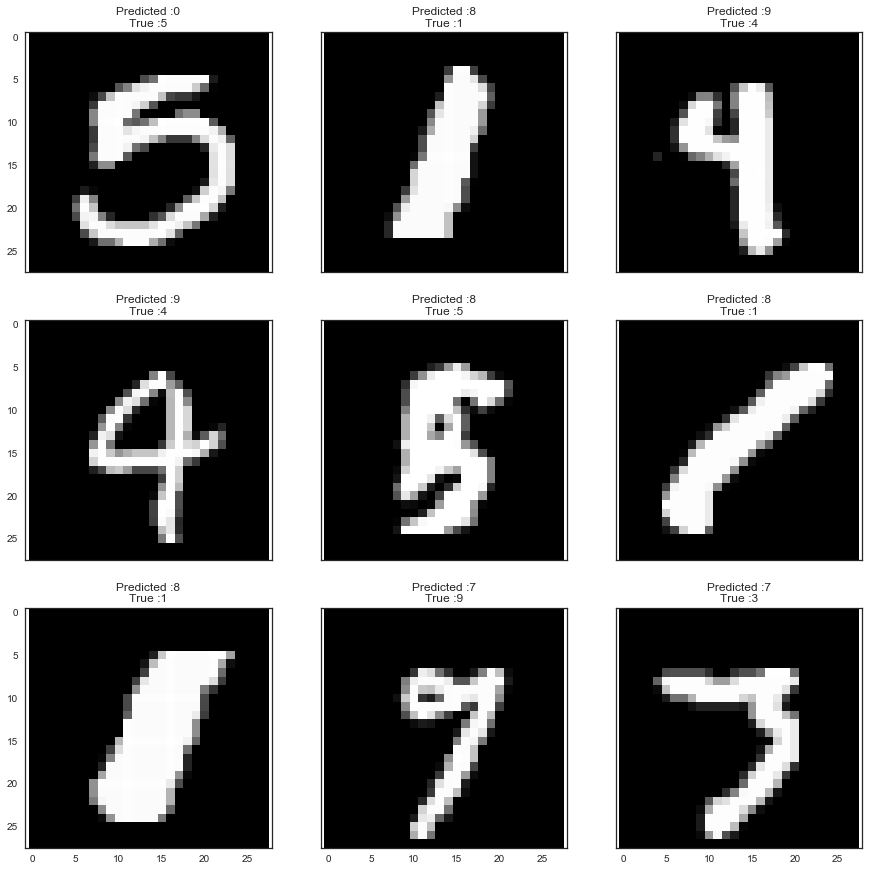

In [79]:
# Plot errors
displayErrors(most_important_errors, X_val_err, y_pred_val_classes_err, y_real_val_err)